# Sleep Disorder Prediction

In [1]:
import pandas as pd

### Importing the Sleep_health_and_lifestyle Dataset from Kaggle

In [7]:
df = pd.read_csv("sleep_health_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,Female,36,Student,4.5,7.9,73,7,Normal,118/66,64,14497,Sleep Apnea
396,397,Female,45,Manual Labor,6.0,6.1,72,8,Obese,132/80,65,12848,Insomnia
397,398,Female,30,Student,5.3,6.5,58,10,Obese,125/76,66,15255,Insomnia
398,399,Female,41,Retired,11.0,9.1,73,9,Obese,130/75,75,6567,Sleep Apnea


### The Dataset details: 
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Key Features of the Dataset:
Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
Cardiovascular Health: Examine blood pressure and heart rate measurements.
Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


### Data Preprocessing 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    object 
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    object 
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    object 
 9   Blood Pressure (systolic/diastolic)    400 non-null    object 
 10  Heart Rate (bpm)                       400 non-null    int64  
 11  Daily 

In [12]:
df.isnull().sum()

Person ID                                  0
Gender                                     0
Age                                        0
Occupation                                 0
Sleep Duration (hours)                     0
Quality of Sleep (scale: 1-10)             0
Physical Activity Level (minutes/day)      0
Stress Level (scale: 1-10)                 0
BMI Category                               0
Blood Pressure (systolic/diastolic)        0
Heart Rate (bpm)                           0
Daily Steps                                0
Sleep Disorder                           290
dtype: int64

In [13]:
# replacing the null vallues with 'None' in the column 'Sleep Disorder'
df['Sleep Disorder'].fillna('None', inplace=True)

In [15]:
df.drop('Person ID', axis=1, inplace=True) # Dropping the 'Peron ID' column as it is not needed for analysis

In [18]:
# now checking the number of unique values in each column
print('Unique values in each column are:')
for col in df.columns:
    print(col, df[col].nunique())

Unique values in each column are:
Gender 2
Age 59
Occupation 4
Sleep Duration (hours) 80
Quality of Sleep (scale: 1-10) 79
Physical Activity Level (minutes/day) 108
Stress Level (scale: 1-10) 10
BMI Category 4
Blood Pressure (systolic/diastolic) 250
Heart Rate (bpm) 51
Daily Steps 393
Sleep Disorder 3


In [22]:
# spliting the blood pressure column into two columns
df['systolic_bp'] = df['Blood Pressure (systolic/diastolic)'].apply(lambda x: x.split('/')[0])
df['distolic_bp'] = df['Blood Pressure (systolic/diastolic)'].apply(lambda x: x.split('/')[1])
df.drop('Blood Pressure (systolic/diastolic)', axis=1, inplace=True)

In [23]:
#replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [24]:
df.head()

,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Heart Rate (bpm),Daily Steps,Sleep Disorder,systolic_bp,distolic_bp
0,Male,29,Manual Labor,7.4,7.0,41,7,Obese,91,8539,None,124,70
1,Female,43,Retired,4.2,4.9,41,5,Obese,81,18754,None,131,86
2,Male,44,Retired,6.1,6.0,107,4,Underweight,81,2857,None,122,70
3,Male,29,Office Worker,8.3,10.0,20,10,Obese,55,6886,None,124,72
4,Male,67,Retired,9.1,9.5,19,4,Overweight,97,14945,Insomnia,133,78


In [25]:
#unique values from categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())

['Manual Labor' 'Retired' 'Office Worker' 'Student']


['Obese' 'Underweight' 'Overweight' 'Normal']


['None' 'Insomnia' 'Sleep Apnea']


## EDA 

<Axes: xlabel='Sleep Disorder', ylabel='count'>

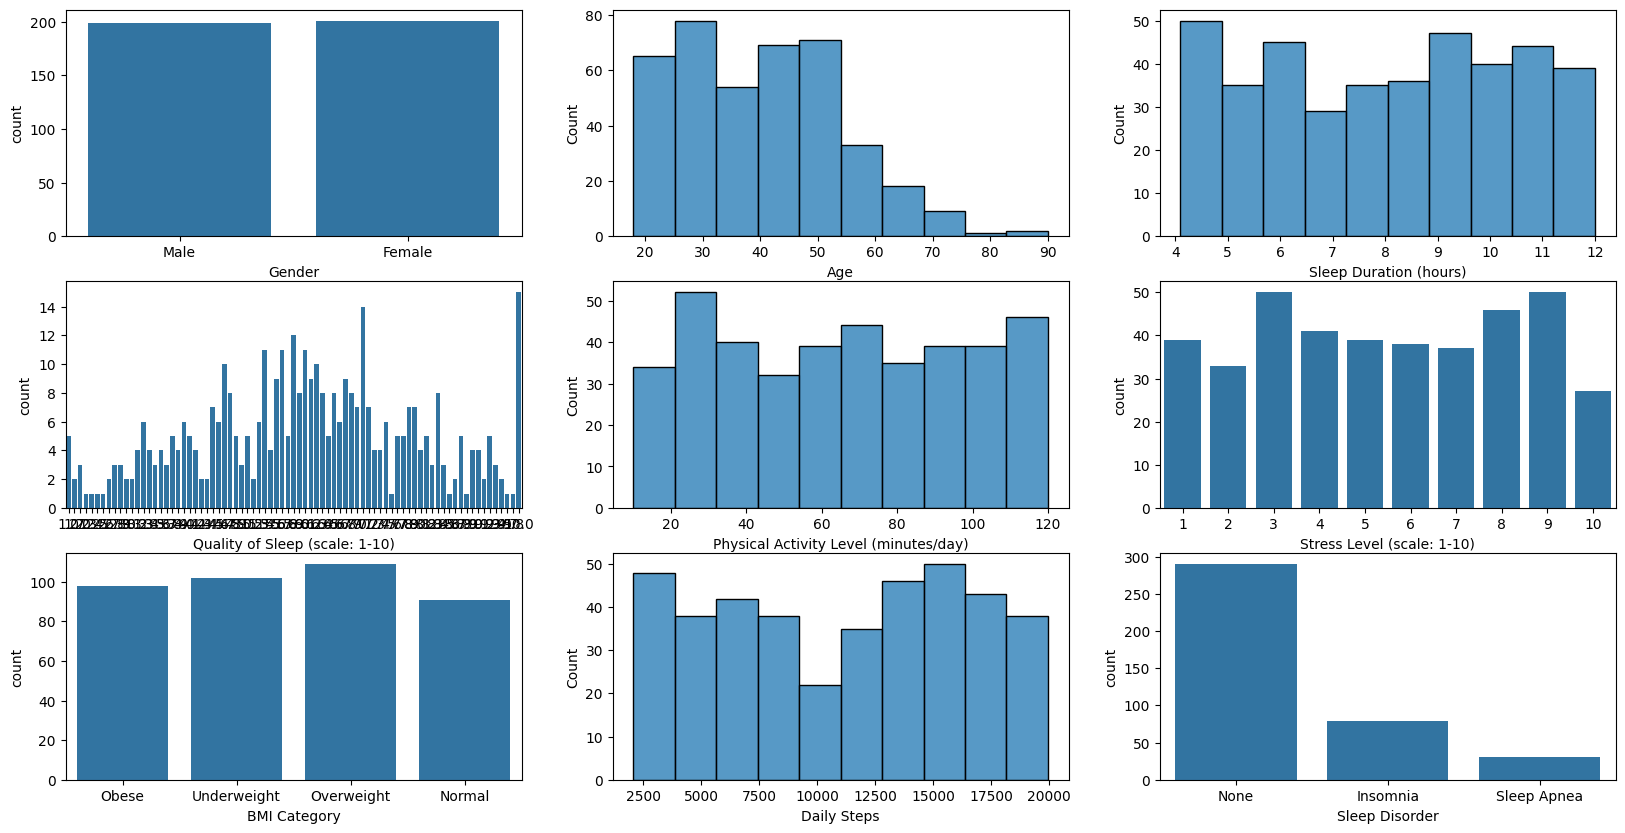

In [28]:
fig,ax = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df, ax = ax[0,0])
sns.histplot(x = 'Age', data = df, ax = ax[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration (hours)', data = df, ax = ax[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep (scale: 1-10)', data = df, ax = ax[1,0])
sns.histplot(x = 'Physical Activity Level (minutes/day)', data = df, ax = ax[1,1], bins = 10)
sns.countplot(x = 'Stress Level (scale: 1-10)', data = df, ax = ax[1,2])
sns.countplot(x = 'BMI Category', data = df, ax = ax[2,0])
sns.histplot(x = 'Daily Steps', data = df, ax = ax[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = df, ax = ax[2,2])

#### above analysis: The number of males and females is almost equal, out of which majority of the people have age between 30-45 years. Most of the people have sleep quality greater than 5 which means there are getting sufficient sleep. Moreover, most of the people have normal BMI whci directly relates with the distribution of sleep disorder which shows equal number of people with and without sleep disorder.

Text(0.5, 1.0, 'Gender and Sleep Disorder')

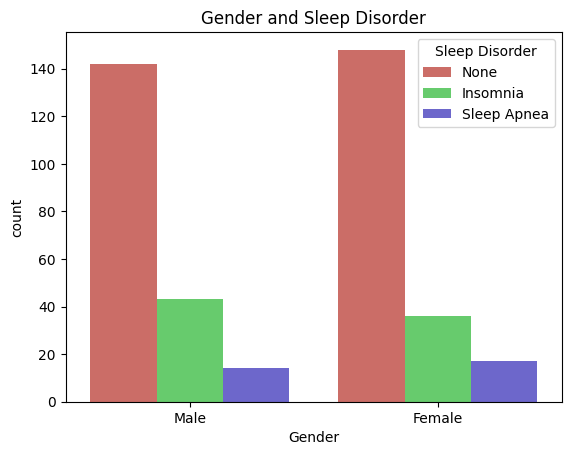

In [29]:
#Gender count plot
sns.countplot(x = 'Gender', data = df, palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')

#### 
Most of the males and females are not suffering from any sleep disorder. However females tend to have more sleep disorder as compared to males. The number of females suffering from Sleep Apnea is quite high as compared to males. But in contrast to that, greater number of males are suffering from Insomia as compared to females.

C:\Users\PARUL\AppData\Local\Temp\ipykernel_15460\360875477.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


[Text(0, 0, 'Manual Labor'),
 Text(1, 0, 'Retired'),
 Text(2, 0, 'Office Worker'),
 Text(3, 0, 'Student')]

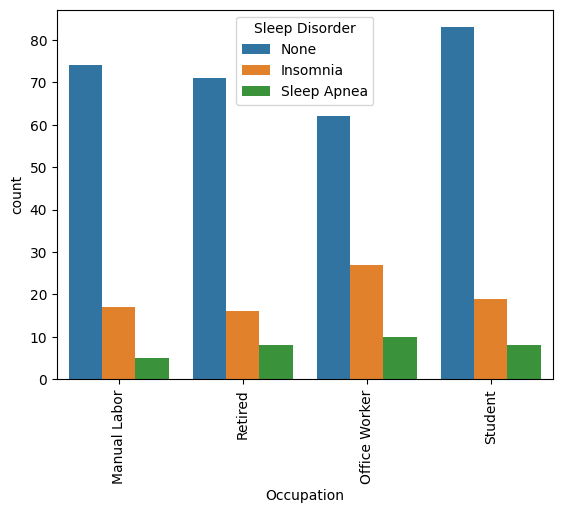

In [30]:
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

#### From the graph it is clear that the occupation has huge impact on the sleep disorder. Nurses are more subjected to have Sleep Apenea as compared to other occupations and very few of them have no sleep disorder. After nurses, the next most affected occupation is the Salesperson, which counts for the most suffering from Insomia followed by teachers. However there are some occupations where most of the people have very few instance of Sleep Apenea and Insomia such as Engineers, Doctors, Accountants, Lawyers. The Software ENgineers and Managers are so less in number so I cannot say much about that, But the occupation Sales Representative has shown only Sleep Apenea and no Insomia or No sleep disorder.

Text(0.5, 1.0, 'BMI Category and Sleep Disorder')

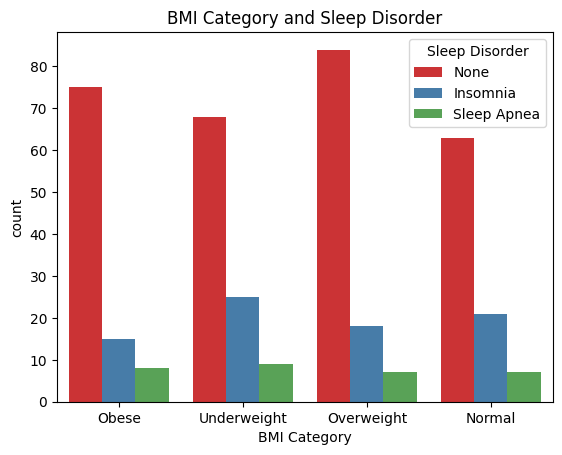

In [31]:
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df, palette = 'Set1').set_title('BMI Category and Sleep Disorder')

## Understanding the correlation between the variables

#### Label Encoding for categorical variables

In [32]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [33]:
cols = ['Gender', 'Occupation', 'Sleep Disorder', 'BMI Category']
for i in cols:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i, ':', df[i].unique())

Gender : [1 0]
Occupation : [0 2 1 3]
Sleep Disorder : [1 0 2]
BMI Category : [1 3 2 0]


### Correlation Matrix Heatmap 

<Axes: >

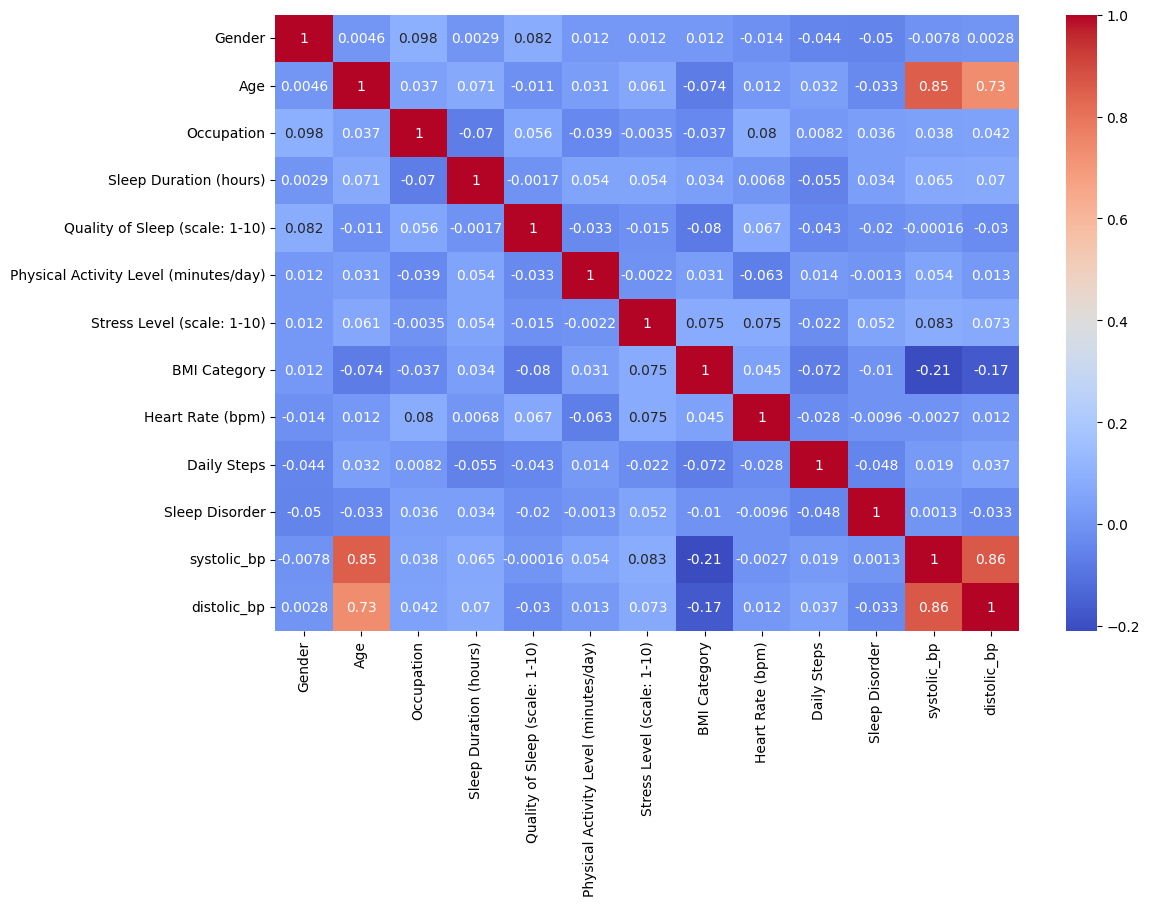

In [35]:
# Correlation matrix Heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot= True, cmap = 'coolwarm')

### Train Test Split

In [36]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Sleep Disorder', axis=1), df['Sleep Disorder'], test_size=0.3, random_state=42)

### For Model Building I will use: 
1. Decision Tree Classifier 
2. Random Forest Classifier


In [37]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree

DecisionTreeClassifier()

In [38]:
d_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [39]:
# training accuracy
print("Training Accuracy:",d_tree.score(X_train,Y_train))

Training Accuracy: 1.0


In [40]:
d_pred = d_tree.predict(X_test)
d_pred

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 1, 1])

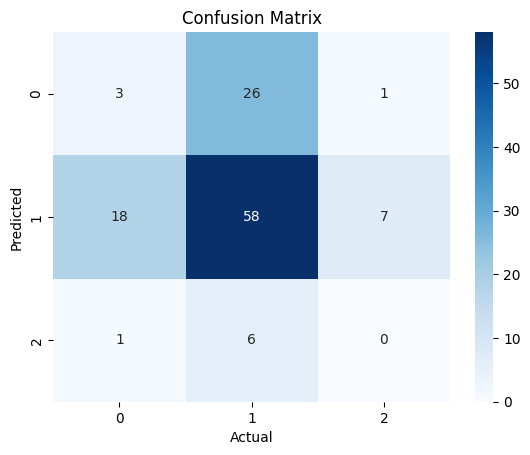

In [42]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test, d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Dsitribution plot for predicted and actual values

C:\Users\PARUL\AppData\Local\Temp\ipykernel_15460\293391989.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
C:\Users\PARUL\AppData\Local\Temp\ipykernel_15460\293391989.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

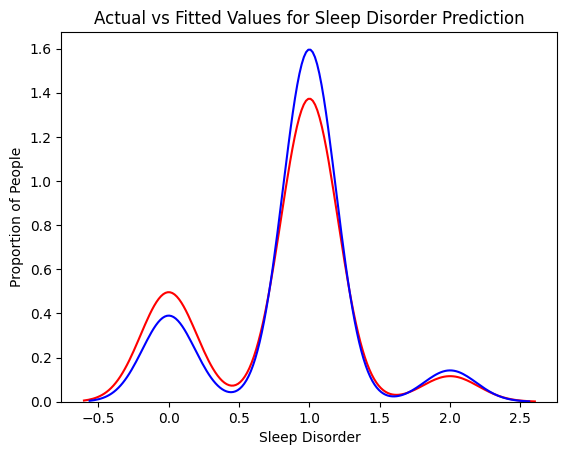

In [43]:
ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

#### The actual values are represented with red and the predicted ones with blue. As shown in the graph, the model's prediction are able to follow the curve of actual values but the predicted values are still different from actual ones. Therefore the model is not able to predict the values accurately.

In [47]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, d_pred))

              precision    recall  f1-score   support

           0       0.14      0.10      0.12        30
           1       0.64      0.70      0.67        83
           2       0.00      0.00      0.00         7

    accuracy                           0.51       120
   macro avg       0.26      0.27      0.26       120
weighted avg       0.48      0.51      0.49       120



In [48]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [50]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [51]:
#Training accuracy
print("Training accuracy: ",rfc.score(X_train,Y_train))

Training accuracy:  1.0


In [52]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

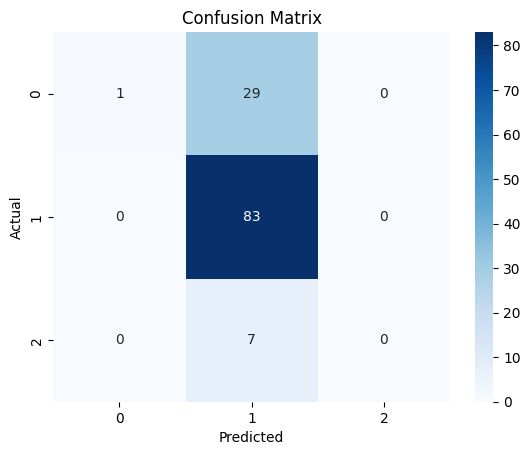

In [53]:
#confusion matrix heatmap
sns.heatmap(confusion_matrix(Y_test, rfc_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\PARUL\AppData\Local\Temp\ipykernel_15460\3836479292.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
C:\Users\PARUL\AppData\Local\Temp\ipykernel_15460\3836479292.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

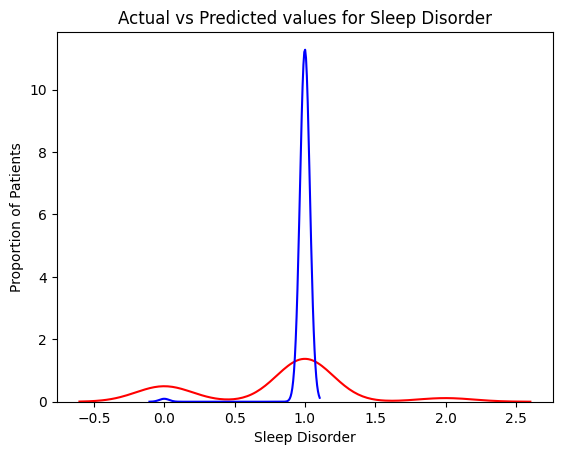

In [54]:
ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

In [56]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        30
           1       0.70      1.00      0.82        83
           2       0.00      0.00      0.00         7

    accuracy                           0.70       120
   macro avg       0.57      0.34      0.30       120
weighted avg       0.73      0.70      0.58       120



C:\Users\PARUL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PARUL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PARUL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:

##### Conclusion: 
From the exploratory data analysis, I have concluded that the sleep orders depends upon three main factors that are gender, occupation and BMI of the patient. The males have more instance of Insomia whereas femlaes have more instances of Sleep Apnea. In addition the that people with occupation such as nurses are more prone to sleep disorders. The BMI of the patient also plays a vital role in the prediction of sleep disorders. The patients who are either Obese or overweight are more prone to sleep disorders.